In [3]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

E:\Ana\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
E:\Ana\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
E:\Ana\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
# load the dataset
vix_data = pd.read_csv('vix_data.csv', parse_dates=['Date'])

# create feature and target variables
X = vix_data[['Close']]
y = vix_data['Close']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# define the hyperparameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# create the K-Nearest Neighbors Regression model
model = KNeighborsRegressor()

# perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'n_neighbors': 3}


In [7]:
# make predictions on the testing data using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [8]:
# evaluate the model using various metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)

# print the evaluation metrics
print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r2)
print("Median Absolute Error:", medae)

RMSE: 0.05341909052837727
MAE: 0.007005762018751485
R^2: 0.999958249385398
Median Absolute Error: 0.0


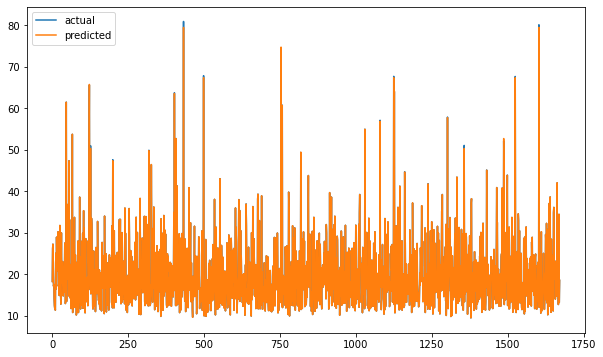

In [9]:
# plot the predictions against the actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='actual')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.show()